In [1]:
from pyoculus.problems import AnalyticCylindricalBfield
from pyoculus.solvers import PoincarePlot, FixedPoint, Manifold
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [23]:
separatrix = {"type": "circular-current-loop", "amplitude": -10, "R": 6, "Z": -5.5}
maxwellboltzmann = {"m": 6, "n": -1, "d": np.sqrt(2), "type": "maxwell-boltzmann", "amplitude": 1e-1}

# Creating the pyoculus problem object, adding the perturbation here use the R, Z provided as center point
pyoproblem = AnalyticCylindricalBfield.without_axis(
    6,
    0,
    0.91,
    0.6,
    perturbations_args=[separatrix],
    Rbegin=1,
    Rend=8,
    niter=800,
    guess=[6.41, -0.7],
    tol=1e-9,
)

# # Adding perturbation after the object is created uses the found axis as center point
pyoproblem.add_perturbation(maxwellboltzmann)

### Finding the X-point
print("\nFinding the X-point\n")

# set up the integrator for the FixedPoint
iparams = dict()
iparams["rtol"] = 1e-13

pparams = dict()
pparams["nrestart"] = 0
pparams["niter"] = 300

# set up the FixedPoint object
fixedpoint = FixedPoint(pyoproblem, pparams, integrator_params=iparams)

# find the X-point
guess = [6.21560891, -4.46981856]
print(f"Initial guess: {guess}")

fixedpoint.compute(guess=guess, pp=0, qq=1, sbegin=4, send=9, tol=1e-10)

if fixedpoint.successful:
    results = [list(p) for p in zip(fixedpoint.x, fixedpoint.y, fixedpoint.z)]
else:
    raise ValueError("X-point not found")

# Set up the manifold
iparams = dict()
iparams["rtol"] = 1e-13
manifold = Manifold(fixedpoint, pyoproblem, integrator_params=iparams)

# Choose the tangles to work with
manifold.choose(0, 0)

0 - dr : 0.010422282084043258
1 - RZ : [ 6.41409394 -0.69368043]
1 - dr : 6.293042617255254e-06
2 - RZ : [ 6.41409781 -0.69367863]
2 - dr : 9.776471937205409e-12
0 - dr : 9.776471937205409e-12

Finding the X-point

Initial guess: [6.21560891, -4.46981856]
0 - [DeltaR, DeltaZ] : [0.37061925 0.29572031] - dtheta : 0.10193215420124901
0 - [StepR, StepZ]: [-0.0234823  -0.02119928]
1 - RZ : [ 6.19212661 -4.49101784] - rhotheta : [ 3.80382127 -1.62918429]
1 - [DeltaR, DeltaZ] : [-0.1651057  -0.17691821] - dtheta : 0.03870184501450491
1 - [StepR, StepZ]: [0.00515258 0.00348819]
2 - RZ : [ 6.19727919 -4.48752965] - rhotheta : [ 3.80004156 -1.62788424]
2 - [DeltaR, DeltaZ] : [-0.01794846 -0.03057362] - dtheta : 0.004221405063145722
2 - [StepR, StepZ]: [ 0.00628992 -0.00868501]
3 - RZ : [ 6.20356912 -4.49621466] - rhotheta : [ 3.80835957 -1.6261052 ]
3 - [DeltaR, DeltaZ] : [0.00043682 0.00019993] - dtheta : 0.00011163054962337604
3 - [StepR, StepZ]: [ 6.34979259e-05 -1.46029593e-04]
4 - RZ : [ 6

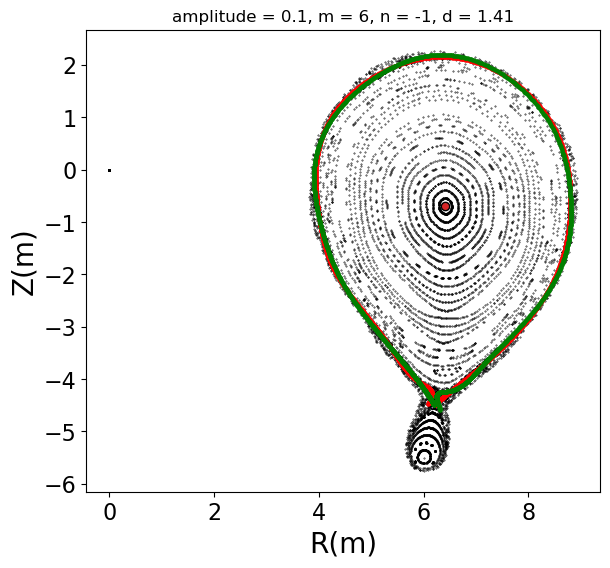

In [278]:
fig = pickle.load(open("manifold_05131749.pkl", "rb"))
ax = fig.gca()

In [25]:
eps_s_1, eps_u_1 = manifold.find_homoclinic()
bounds_1 = manifold.find_bounds(eps_s_1, eps_u_1)

2024-05-13 14:18:44 [info     ] Search for minimum of the linear error succeeded, epsilon = 2.05960e-07
2024-05-13 14:18:44 [info     ] Search for minimum of the linear error succeeded, epsilon = 3.03587e-07
2024-05-13 14:18:44 [debug    ] Guess - 2.841750466895082e-06, 4.188768464800437e-06
2024-05-13 14:18:44 [debug    ] Bounds - ((2.0595969838639006e-07, 5.8894606321765535e-06), (3.035869220114105e-07, 8.681123851612285e-06))
2024-05-13 14:18:44 [debug    ] n_s, n_u - 7, 6
2024-05-13 14:18:44 [debug    ] Inside : (2.8417504668950798e-06, 4.188768464800439e-06)
2024-05-13 14:18:45 [debug    ] Returns - (array([8.55998403, 0.58940135]), array([5.3213701, 1.919133 ]), array([ 3.23861393, -1.32973165]))
2024-05-13 14:18:45 [debug    ] Inside : (5.986121366327795e-06, 1.939076393951113e-05)
2024-05-13 14:18:46 [debug    ] Returns - (array([ 8.80256495, -0.46939602]), array([4.15402648, 0.84662209]), array([ 4.64853847, -1.31601811]))
2024-05-13 14:18:46 [debug    ] Inside : (5.2249336886

In [26]:
bounds_i = np.array(bounds_1)
bounds_i[0][0] = manifold.clinics[-1][1]
bounds_i[1][1] = manifold.clinics[-1][2]
bounds_i = (tuple(bounds_i[0]), tuple(bounds_i[1]))

In [27]:
bounds_1

((2.179774577375764e-07, 6.233109701299461e-06),
 (3.84907705931755e-06, 0.00011005805429358986))

In [28]:
bounds_i

((2.179774577375764e-07, 6.233109701299461e-06),
 (3.84907705931755e-06, 3.84907705931755e-06))

In [29]:
# i = 1
fund = manifold.fundamental_segment
# guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 5/6), bounds_1[1][0]*np.power(manifold.lambda_u, 5/6)]
guess_i = [bounds_1[0][1]*np.power(manifold.lambda_s, 1/2), bounds_1[1][0]*np.power(manifold.lambda_u, 1/2)]
print(f"initial guess: {guess_i}")

initial guess: [1.1656201482317757e-06, 2.0582794142574214e-05]


In [30]:
eps_s_i, eps_u_i = manifold.find_homoclinic(*guess_i, bounds = bounds_i, n_s=7, n_u=5, options={"factor": 0.1})

2024-05-13 14:19:46 [debug    ] Guess - 1.1656201482317757e-06, 2.0582794142574214e-05
2024-05-13 14:19:46 [debug    ] Bounds - ((2.179774577375764e-07, 6.233109701299461e-06), (3.84907705931755e-06, 3.84907705931755e-06))
2024-05-13 14:19:46 [debug    ] n_s, n_u - 7, 5
2024-05-13 14:19:46 [debug    ] Inside : (1.1656201482317755e-06, 2.0582794142574204e-05)
2024-05-13 14:19:47 [debug    ] Returns - (array([7.40300421, 1.88446148]), array([7.71563303, 1.68237711]), array([-0.31262882,  0.20208437]))
2024-05-13 14:19:47 [debug    ] Inside : (0.0037637839475494236, 4.3992560546805616e-05)
2024-05-13 14:19:48 [debug    ] Returns - (array([ 6.24598307, -4.33731174]), array([6.64962512, 2.1270701 ]), array([-0.40364205, -6.46438184]))
2024-05-13 14:19:48 [debug    ] Inside : (1.6728585433895271e-06, 2.089840871498374e-05)
2024-05-13 14:19:49 [debug    ] Returns - (array([7.9658967 , 1.44810164]), array([7.69641955, 1.69615396]), array([ 0.26947715, -0.24805232]))
2024-05-13 14:19:49 [debug 

In [31]:
manifold.clinics

[(3.84907705931755e-06,
  2.179774577375764e-07,
  3.84907705931755e-06,
  array([5.41601047, 1.96063451]),
  array([5.41601048, 1.96063451])),
 (2.3884810186719217e-05,
  1.2560522331587575e-06,
  2.388481018696467e-05,
  array([7.52275414, 1.80967461]),
  array([7.52275414, 1.80967461]))]

In [279]:
marker = ["X", "o", "s", "p", "P", "*", "x", "D", "d", "^", "v", "<", ">"]
for i, clinic in enumerate(manifold.clinics):
    eps_s_i, eps_u_i = clinic[1:3]

    n_s, n_u = 10, 10
    
    hs_i = manifold.integrate(manifold.rfp_s + eps_s_i * manifold.vector_s, n_s, -1)
    hu_i = manifold.integrate(manifold.rfp_u + eps_u_i * manifold.vector_u, n_u, 1)
    # ax.scatter(hs_i[0,:], hs_i[1,:], marker=marker[i], color="purple", zorder=10)
    ax.scatter(hu_i[0,:], hu_i[1,:], marker=marker[i], color="royalblue", edgecolor='cyan', zorder=10, label=f'$h_{i+1}$')

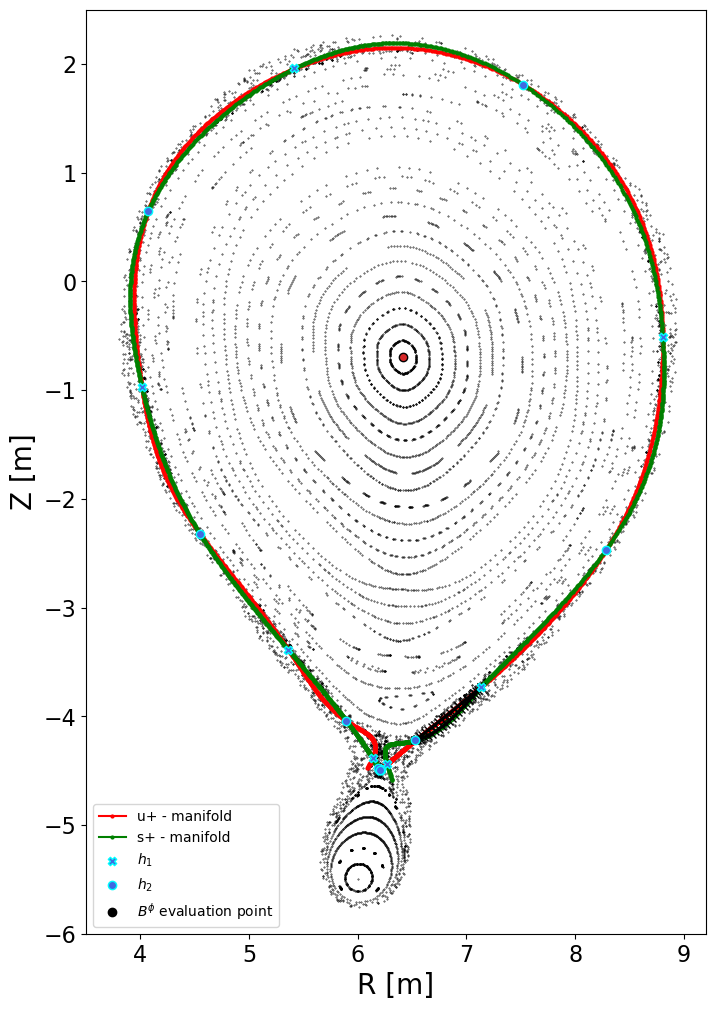

In [285]:
fig.set_size_inches(12, 12)
ax.set_xlim(3.5, 9.2)
ax.set_ylim(-6, 2.5)
ax.set_title('')
ax.set_xlabel(r'R [m]')
ax.set_ylabel(r'Z [m]')

ax.legend()


fig

In [274]:
pickle.dump(fig, open("perturbed-6-1-0.1-general.pkl", "wb"))

In [56]:
eps_s, eps_u = manifold.fundamental_segment
eps_s, eps_u = eps_s[0], eps_u[0]

In [82]:
manifold.compute(eps_s=eps_s, eps_u=eps_u, neps=40)

2024-05-13 14:43:57 [info     ] Computing unstable manifold with postive epsilon...
2024-05-13 14:44:03 [info     ] Computing stable manifold with positive epsilon...


In [124]:
rh = manifold.integrate_single(manifold.rfp_u + manifold.clinics[1][0]*manifold.vector_u, 3, 1, ret_jacobian=False)

In [281]:
default = {
    "markersize": 2,
    "fmt": "-x",
    "colors": ["red", "blue"],
}

area_calc = []
dirdict = [manifold.unstable["+"], manifold.stable["+"]]

for i, out in enumerate(dirdict):
    tmpcolor = default["colors"][i]
    
    if i == 0:
        area_calc.append(out[44:80, 3])
        out = out[44:80, 3]
    else:
        area_calc.append(out[:42, 9])
        out = out[:42, 9]

    out = out.T.flatten()

    if i==0:
        out = np.concatenate((rh, out))
    else:
        out = np.concatenate((out, rh))

    ax.plot(
        out[::2],
        out[1::2],
        default["fmt"],
        color='black',
        markersize=6,
        linewidth=2
    )

In [170]:
path1 = area_calc[0].reshape(-1,2)
path2 = area_calc[1].reshape(-1,2)

path1 = np.vstack((rh, path1))
path2 = np.vstack((path2, rh))

In [181]:
path1.T

array([[ 6.52784459,  6.5454184 ,  6.5693817 ,  6.59463117,  6.62119272,
         6.64908873,  6.67833788,  6.70895489,  6.74095033,  6.77433052,
         6.80909736,  6.84524829,  6.88277623,  6.92166956,  6.96191211,
         7.00348327,  7.04635799,  7.09050694,  7.1358966 ],
       [-4.22212827, -4.2079466 , -4.18865863, -4.16838645, -4.14710389,
        -4.12478467, -4.10140232, -4.07692991, -4.05133991, -4.02460398,
        -3.99669277, -3.96757577, -3.93722114, -3.90559559, -3.87266432,
        -3.83839088, -3.80273724, -3.76566372, -3.72712905]])

In [180]:
path2.T

array([[ 7.1358967 ,  7.10568792,  7.07730503,  7.05034204,  7.02439037,
         6.99904627,  6.97391906,  6.94864069,  6.9228762 ,  6.89633542,
         6.86878488,  6.8400594 ,  6.81007198,  6.7788204 ,  6.74638899,
         6.71294417,  6.67872317,  6.6440169 ,  6.60914919,  6.57445606,
         6.54026867,  6.52784459],
       [-3.72712894, -3.76005619, -3.79151559, -3.82178015, -3.85109218,
        -3.87966074, -3.90765848, -3.93521765, -3.9624251 , -3.98931641,
        -4.01586991, -4.04200127, -4.06756022, -4.09233106, -4.11603909,
        -4.13836492, -4.15896814, -4.17752049, -4.19374646, -4.20746641,
        -4.21863455, -4.22212827]])

In [190]:
# Concatenate the paths to form a loop
loop = np.vstack((path1[1:], path2[1:]))

x = loop[:, 0]
y = loop[:, 1]
area = 0.5*np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

In [282]:
ax.scatter(6.7913, -4.0464, color='black', label='$B^\phi$ evaluation point')

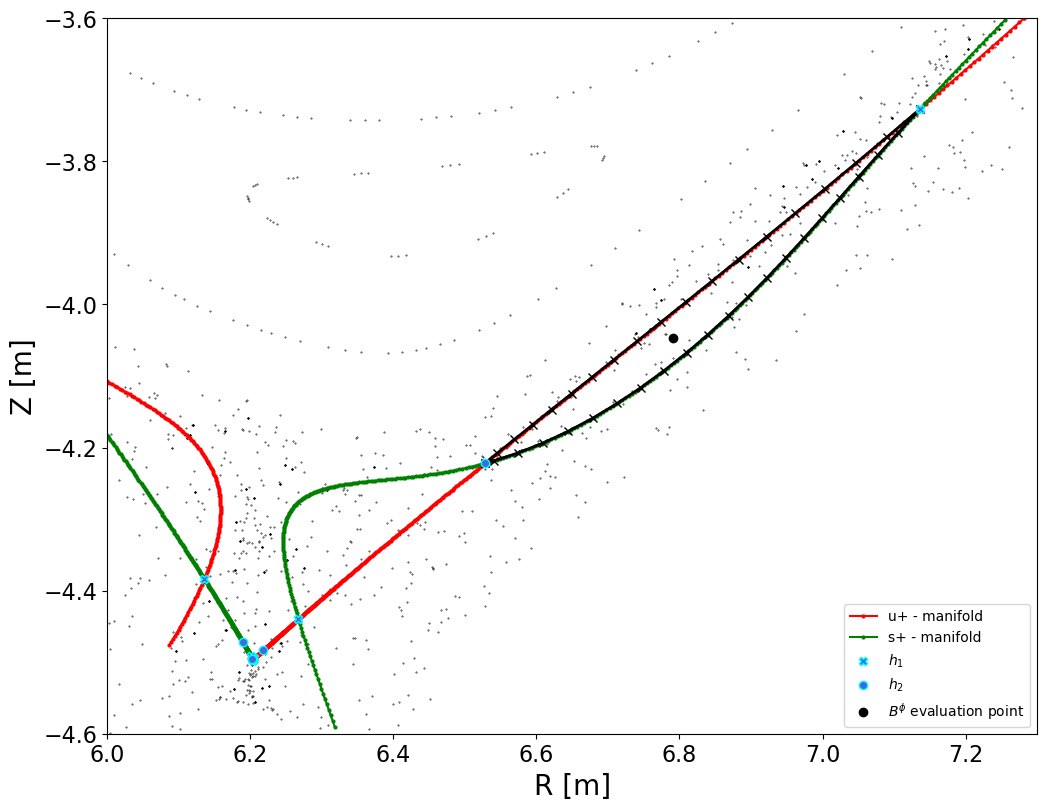

In [283]:
ax.legend()
ax.set_xlim(6, 7.3)
ax.set_ylim(-4.6, -3.6)
fig

In [284]:
pickle.dump(fig, open("perturbed-6-1-0.1-closeup.pkl", "wb"))

In [152]:
pyoproblem.B([6.7913, 0., -4.0464])

array([-1.9320194 , -2.09995078, -0.0903154 ])

In [193]:
area * pyoproblem.B([6.7913, 0., -4.0464])[1] * 6.7913

-0.3907701398921498

#### Area by computation

In [156]:
manifold.resonance_area()

2024-05-13 15:04:02 [info     ] Forward integration goes beyond stable saddle point.
2024-05-13 15:04:02 [debug    ] rfp_s: [ 6.20363263 -4.49636071], rze_end: [ 6.2036283  -4.49636463], rze_forward: [ 6.20363237 -4.49636066]
2024-05-13 15:04:02 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-13 15:04:02 [debug    ] rfp_u: [ 6.20363263 -4.49636071], rze_end: [ 6.20364463 -4.49638169], rze_backward: [ 6.20363315 -4.49636135]
2024-05-13 15:04:02 [info     ] Potential integration completed for homo/hetero-clinic point of order : 3.849e-06
2024-05-13 15:04:03 [info     ] Forward integration goes beyond stable saddle point.
2024-05-13 15:04:03 [debug    ] rfp_s: [ 6.20363263 -4.49636071], rze_end: [ 6.20363013 -4.49636292], rze_forward: [ 6.20363192 -4.4963597 ]
2024-05-13 15:04:03 [info     ] Backward integration goes beyond unstable saddle point.
2024-05-13 15:04:03 [debug    ] rfp_u: [ 6.20363263 -4.49636071], rze_end: [ 6.20363578 -4.49636621], rze_backward: 

(array([-0.38894751,  0.38894751]),
 [[array([  0.14953653, -12.93054128,  -9.36836806,  10.14527448,
           12.33919351,  12.42305314,  12.42600038]),
   array([ 11.58621693,  18.06254198,  12.59244268, -10.27666016,
          -12.34596912, -12.42329342, -12.42601802])],
  [array([-15.19868216,   2.93759371, -18.93354427,   2.93620694,
           11.9329673 ,  12.4085431 ,  12.42549035]),
   array([  2.059409  ,  27.86556189,  -2.24704308, -11.93503731,
          -12.40867923, -12.42549234, -12.42608427])]],
 [[array([ 6.20363237, -4.49636066]), array([ 6.20363315, -4.49636135])],
  [array([ 6.20363192, -4.4963597 ]), array([ 6.20363276, -4.49636088])]])

In [158]:
manifold.areas

array([-0.38894751,  0.38894751])

In [194]:
manifold.areas.sum()

0.0